# Формирование модели успешности игр

## Оглавление проекта

[Описание проекта](#section1)

[Описание данных](#section2)

[Шаг 1. Общая информация](#section3)

[Шаг 2. Подготовка данных](#section4)

[Шаг 3. Исследовательский анализ данных](#section5)

[Шаг 4. Портрет пользователя каждого региона](#section6)

[Шаг 5. Проверка гипотез](#section7)

[Шаг 6. Общий вывод](#section8)

## Описание проекта<a id='section1'></a>

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры

## Описание данных<a id='section2'></a>



## Шаг 1. Общая информация<a id='section3'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv(filename)

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.duplicated().sum()

0

#### Вывод:

1. Практически в каждом столбце есть свои пропущенные значения, особенно много пропусков в данных с рейтингами игр. Возможно в какие-то года, каких-то рейтингов еще не существовало, или какие-то игры не участвовали в оценках по тем или иным причинам.

2. Названия столбцов с разными регистрами, надо привести к нижнему

3. Дупликатов нет.

## Шаг 2. Подготовка данных<a id='section4'></a>

In [6]:
#приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
#посмотрим на 2 строки в столбце  'name' c NaN
df[df['name'].isnull()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
df['na_sales'].sum()

4402.35

In [9]:
#удалим эти 2 строки, так как информация от этих двух строк незначительна
df=df.dropna(subset=['name'], axis='index').reset_index(drop=True)

In [10]:
df.year_of_release.isna().sum()

269

In [11]:
df[df['year_of_release'].isnull()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10999,Demon Chaos,PS2,NaN,Action,0.00,0.00,0.09,0.00,NaN,NaN,NaN
10049,Star Trek: Conquest,PS2,NaN,Strategy,0.06,0.04,0.00,0.01,54.0,9.1,E
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
11564,Rock Revolution,Wii,NaN,Misc,0.07,0.00,0.00,0.01,46.0,tbd,T
8739,Home Run,2600,NaN,Sports,0.14,0.01,0.00,0.00,NaN,NaN,NaN
2272,LEGO Harry Potter: Years 5-7,PS3,NaN,Action,0.36,0.41,0.00,0.15,76.0,8.3,E10+
6100,Haven: Call of the King,PS2,NaN,Platform,0.14,0.11,0.00,0.04,69.0,6.9,T
9854,The Daring Game for Girls,DS,NaN,Adventure,0.11,0.00,0.00,0.01,NaN,tbd,E
2452,The Lord of the Rings: War in the North,X360,NaN,Action,0.52,0.24,0.00,0.08,61.0,7.4,M
13194,Tour de France 2011,X360,NaN,Racing,0.00,0.04,0.00,0.01,46.0,7.6,NaN


In [12]:
#Пропусков по годам не очень большое количество, заполним пропуски в годах маркером 1111, 
#и отследим в дальнейшем его поведение в данных
df['year_of_release']= df['year_of_release'].fillna(1111) 

Пропуски в оценках критиков, оставим пропусками, так как апроксимировать эти значения, значит сильно искажать картину, а рейтинги будут необъективными. Заполним пропуски в оценках критиков маркером 2222, так их удобнее отслеживать в дальнейшем:

In [13]:
df['critic_score']= df['critic_score'].fillna(2222) 

Заменим значения tbd (to be determined - рейтинг будет определен) в столбце user_score на nan, так как пока этого рейтинга нет, и все nan заполним маркером 3333. Заполнять пропуски апроксимированными значениями, значит сильно искажать картину, и рейтинги будут необъективными.

In [14]:
len(df.query('user_score == "tbd"'))

2424

In [15]:
df['user_score'].isna().sum()

6699

In [16]:
df = df.replace('tbd', np.nan)

In [17]:
#приведем к типу float
df['user_score'] = df['user_score'].astype(float)

In [18]:
df['user_score']= df['user_score'].fillna(3333) 

Заполним пропуски в столбце 'rating' значением none,  потому как мы не знаем возрастного ограничения по играм

In [19]:
df['rating']=df['rating'].fillna('none')

Поменяем тип данных столбца 'year_of_release' на целочисленный

In [20]:
df['year_of_release'] =  df['year_of_release'].astype(int)

In [21]:
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Посчитаем суммарные продажи по регионам, и запишем в отдельный столбец 'total_sales'

In [22]:
#напишем функцию, которая считает сумму столбцов с продажами
def total_sales(row):
    
    a=row['na_sales']
    b=row['eu_sales']
    c=row['jp_sales']
    d=row['other_sales']
    
    total_sales = a+b+c+d
    
    return total_sales

In [23]:
df['total_sales']=df.apply(total_sales, axis=1)

In [24]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,2222.0,3333.0,none,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,2222.0,3333.0,none,31.38


#### Вывод

1. Мы привели названия столбцов к нижнему регистру

2. Преобразовали year_of_release в тип int, для того чтобы применять все методы к этому столбцу;

3. Удалили две строки с nan в name, как несущественные

4. Обработали пропуски в столбцах:

    - **year_of_release** маркером 1111, ;
    - **critic_score** - пропуски в оценках критиков, оставим пропусками, так как апроксимировать эти значения, значит сильно искажать картину, и рейтинги будут необъективными. Заполнили пропуски в оценках критиков маркером 2222, так их удобнее отслеживать в дальнейшем:;
    - **user_score** - заменили значения tbd (to be determined - рейтинг будет определен) в столбце user_score на nan, так как пока этого рейтинга нет, и все nan заполним маркером 3333. Заполнять пропуски апроксимированными значениями, значит сильно искажать картину, и рейтинги будут необъективными.
    - заполнили пропуски в столбце **'rating'** значением none,  потому как мы не знали возрастного ограничения по играм;


5. Посчитали суммарные продажи по регионам, и запишем в отдельный столбец 'total_sales'.

## Шаг 3. Исследовательский анализ данных<a id='section5'></a>

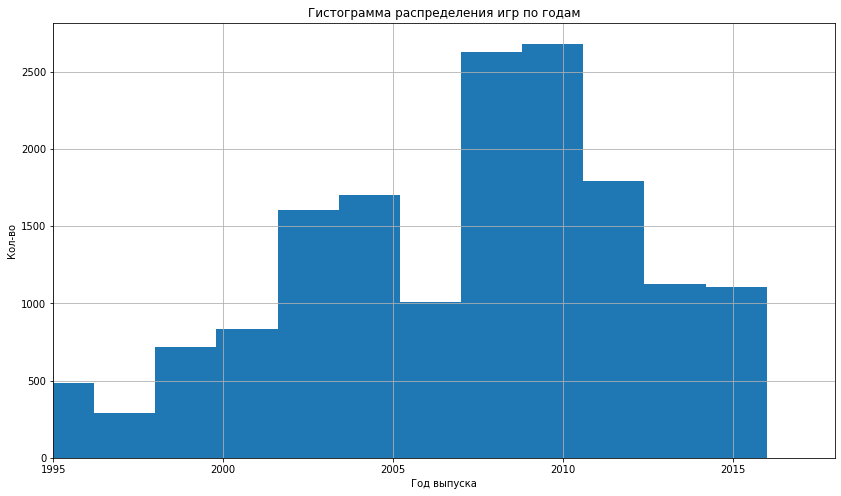

In [25]:
#посморим количество игр, выпускемых в разные годы, исключив значения с 1111:
df.query('year_of_release>1111')['year_of_release'].hist(bins=20, figsize=(14, 8))
plt.title('Гистограмма распределения игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во')
plt.xlim(1995,2018);

In [26]:
df['year_of_release'].value_counts().tail(15).sum()/len(df)

0.029079159935379646

За первые 15 лет индустрия произвела 3% всех игр и можем смело их отбросить и рассматривать игры с 1995 года

In [27]:
df=df.query('year_of_release > 1995')

Посмотрим распределение объемов продаж по платформам

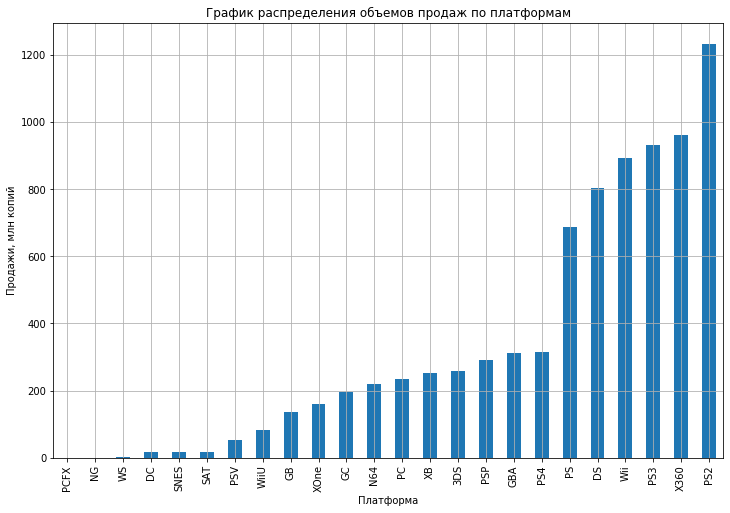

In [28]:
df.groupby('platform')['total_sales'].agg('sum').sort_values().plot(kind='bar', figsize=(12,8))
plt.title('График распределения объемов продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн копий')
plt.grid();

Мы видим самые высокие продажи на платтформах PS2, X360, PS3, Wii, DS, PS. После этого продажи уменьшаются в два раза.

Возьмем эти шесть платформ, добавим туда игры на PC(как вечную классику) и построим распределение объема продаж по годам:

In [29]:
df_stars = df.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS", "PC")')
df_stars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10087 entries, 0 to 16709
Data columns (total 12 columns):
name               10087 non-null object
platform           10087 non-null object
year_of_release    10087 non-null int64
genre              10087 non-null object
na_sales           10087 non-null float64
eu_sales           10087 non-null float64
jp_sales           10087 non-null float64
other_sales        10087 non-null float64
critic_score       10087 non-null float64
user_score         10087 non-null float64
rating             10087 non-null object
total_sales        10087 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.0+ MB


In [30]:
df_stars_pivot = df_stars.pivot_table('total_sales', index='year_of_release', columns='platform', aggfunc='sum')

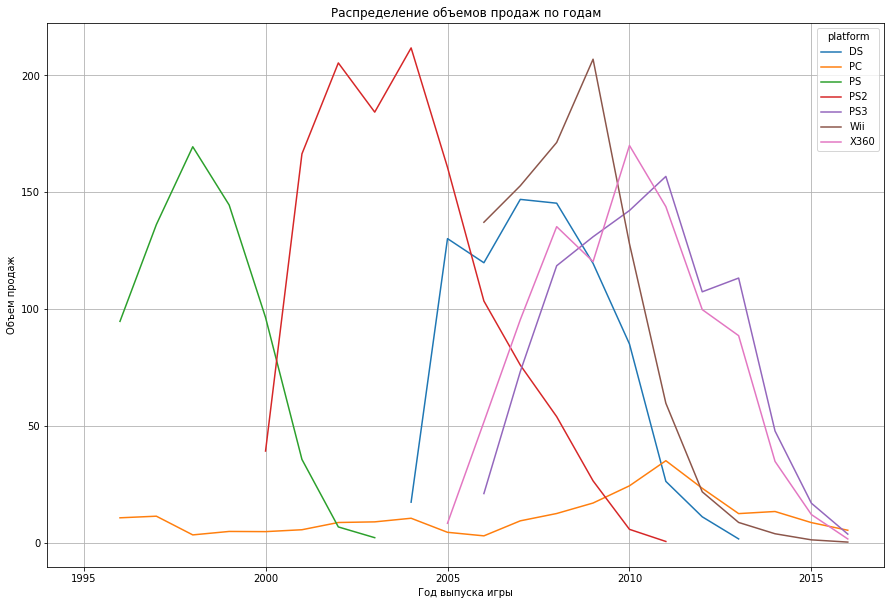

In [31]:
df_stars.pivot_table('total_sales', index='year_of_release', columns='platform', aggfunc='sum')\
                    .plot(figsize=(15,10), grid = True, title='Распределение объемов продаж по годам', xlim=(1994, 2017));
plt.ylabel('Объем продаж')
plt.xlabel('Год выпуска игры');

Интересно, что средний срок жизни жизни платформы 8-11 лет. За время платформа растет, доходит до пика и угасает. Все распределения напоминают нормальные. А вот игры на PC имеют некую постоянную величину с небольшим пиком в 2011.

Построим гистограммы распределения продаж последних пяти лет. чтобы посмотреть какие платформы растут или находятся на пике своих продаж

In [32]:
df1 = df.query('year_of_release >= 2010')

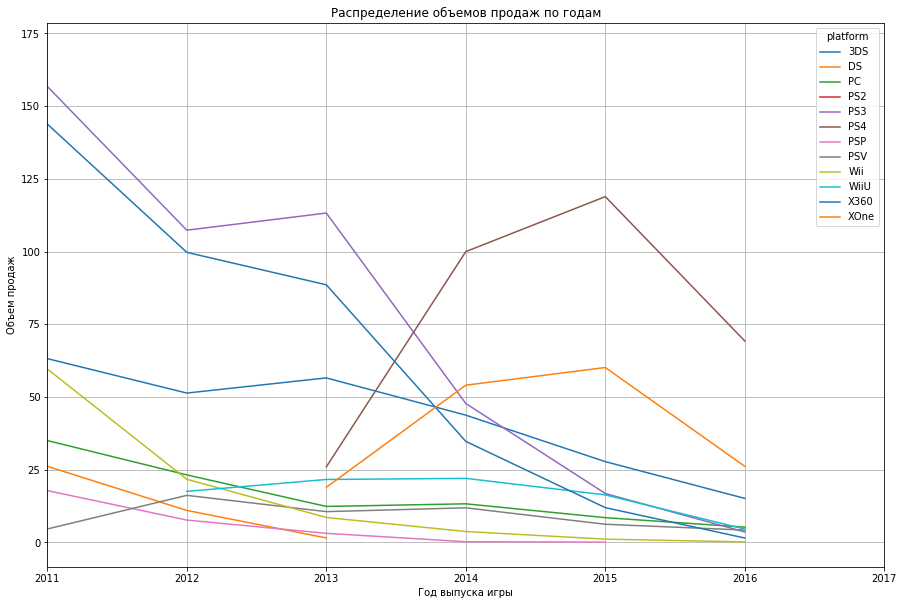

In [33]:
df1.pivot_table('total_sales', index='year_of_release', columns='platform', aggfunc='sum')\
                    .plot(figsize=(15,10), grid = True, title='Распределение объемов продаж по годам', xlim=(2011,2017));
plt.ylabel('Объем продаж')
plt.xlabel('Год выпуска игры');

Из этих графиков можем заключить, что в 2016 у следующих платформ есть продажи и будут на следующий год и потенциал для роста (PS4, XOne):

1. PS4 - продажи около 70 млн, 3 года на рынке
2. XOne - продажи 25 млн, 3 года на рынке
3. WiiU - продажи около 5 миллионов, игра появилась в 2012
4. 3DS - продажи около 15 миллионов, игра появилась в 2011
5. PC - продажи около 5 миллионов, платформа актуальна всегда.

Актуальным можем считать период с 2013 года, в это время появляются новые платформы и стремятся продажи к нулю у старых.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [34]:
#Опредедим актуальный срез по этим 5 играм начиная с 2013 года
df_act = df.query('(platform in ("PS4", "XOne", "WiiU", "3DS", "PC")) and (year_of_release > 2012)')
df_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 31 to 16690
Data columns (total 12 columns):
name               1246 non-null object
platform           1246 non-null object
year_of_release    1246 non-null int64
genre              1246 non-null object
na_sales           1246 non-null float64
eu_sales           1246 non-null float64
jp_sales           1246 non-null float64
other_sales        1246 non-null float64
critic_score       1246 non-null float64
user_score         1246 non-null float64
rating             1246 non-null object
total_sales        1246 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 126.5+ KB


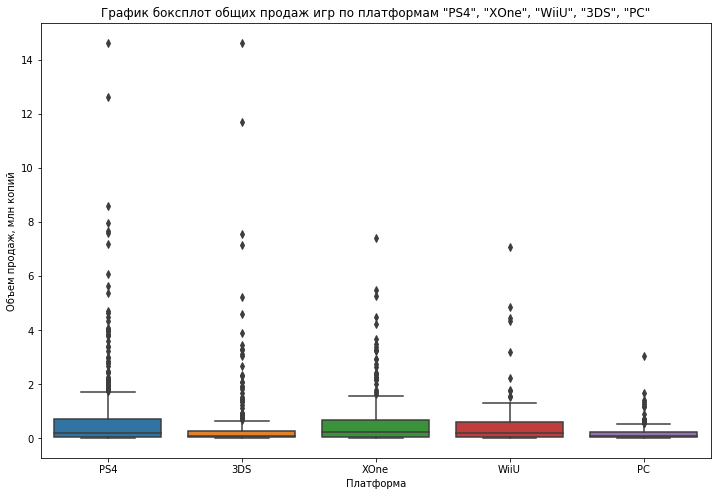

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(x='platform', y='total_sales', data = df_act)
plt.title('График боксплот общих продаж игр по платформам "PS4", "XOne", "WiiU", "3DS", "PC"')
plt.ylabel('Объем продаж, млн копий')
plt.xlabel('Платформа');

Распределения по графику боксплот выглядят у всех очень похожими, выбросы говорят о том, что основная масса выпускаемых игр имеет относительно невысокие продажи в то время как единицы из них становятся “блокбастерами” с милионными тиражами. Лидер PS4 по играм с наибольшими продажами.

Приблизим масштаб по оси y и посмотрим ящики.

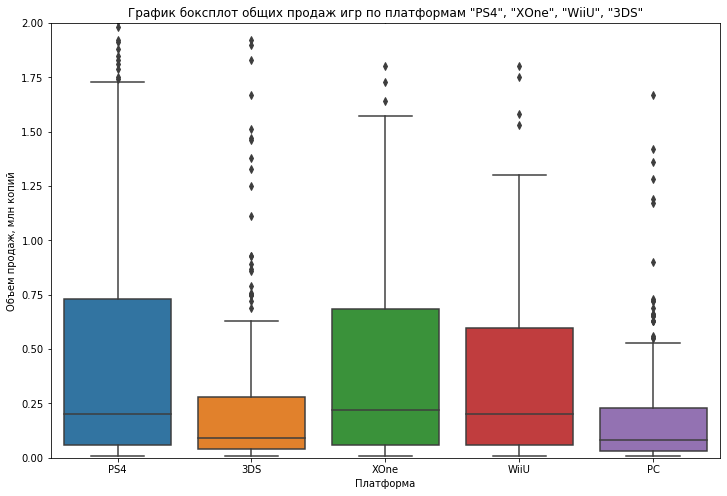

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(x='platform', y='total_sales', data = df_act)
plt.ylim(0,2)
plt.title('График боксплот общих продаж игр по платформам "PS4", "XOne", "WiiU", "3DS"')
plt.ylabel('Объем продаж, млн копий')
plt.xlabel('Платформа');

У всех пяти платформ основная масса игр имеет продажи до 0,75 млн копий. у PS4 и XOne они совсем похожи, WiiU имеет меньше продаж копий, у 3DS и PC самые небольшие продажи копий.

**Посмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков.** Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [37]:
df_ps4=df.query('(platform == "PS4") and (critic_score != "2222") and (user_score !="3333")').reset_index(drop=True)
df_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
2,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
4,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
244,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
245,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
246,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,none,0.01
247,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


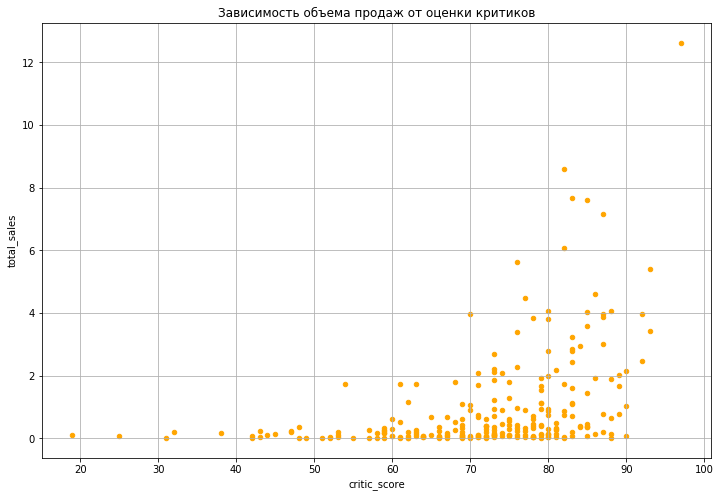

In [38]:
df_ps4.plot(x='critic_score',y='total_sales',kind='scatter', title='Зависимость объема продаж от оценки критиков', \
            grid=True, figsize=(12,8), color='orange');

Никакой зависимости объемов продаж от оценки критиков вне прослеживается. Можно сказать что большее количество игр имеют оценку выше средней. Также можно сказать что игры с высокими имеют оценку критиков больше 70.

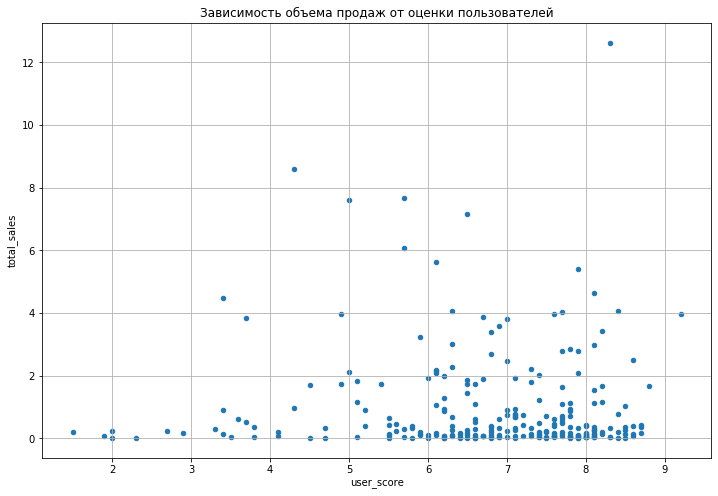

In [39]:
df_ps4.plot(x='user_score',y='total_sales',kind='scatter', title='Зависимость объема продаж от оценки пользователей', \
            grid=True, figsize=(12,8));

Никакой зависимости объемов продаж от оценки пользователей вне прослеживается. Можно сказать что большее количество игр имеют оценку выше средней, а также есть игры с низкими оценками пользователей и высокими объемами продаж.

Посчитаем матрицу корреляций для продаж, оценок критиков и оценок пользователей. 

In [40]:
df_ps4_corr = df_ps4[['critic_score', 'user_score', 'total_sales']]
df_ps4_corr.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales,0.405895,-0.033625,1.000000


Из матрицы корреляций видим слабую корреляцию в зависимости объемов продаж от оценки критиков. По диаграмме рассеяния это видно. и отсутствие связи между оценками пользователей и объемами продаж.

**Построим аналогичные диаграммы рассеяния для платформы XOne:**

In [41]:
df_xone=df.query('platform == "XOne" and (critic_score != "2222") and (user_score !="3333")').reset_index(drop=True)


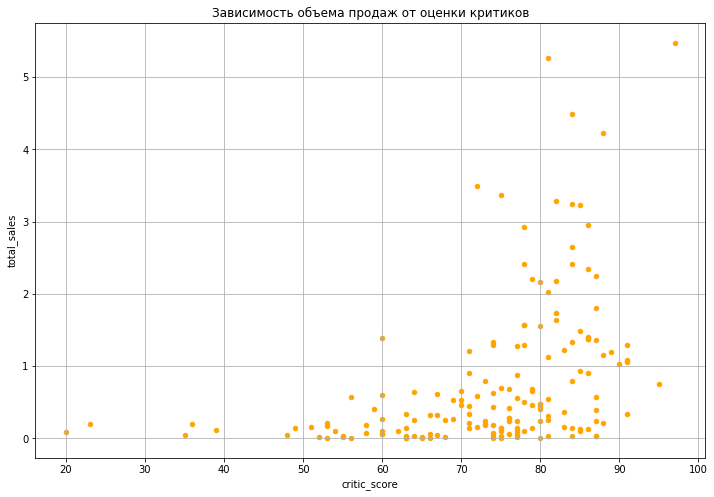

In [42]:
df_xone.plot(x='critic_score',y='total_sales',kind='scatter', title='Зависимость объема продаж от оценки критиков', \
            grid=True, figsize=(12,8), color='orange');

На более высоких оценках критиков у платформы Xone появляются игры с большими продажами. Также можно сказать что игры с высокими имеют оценку критиков больше 70.

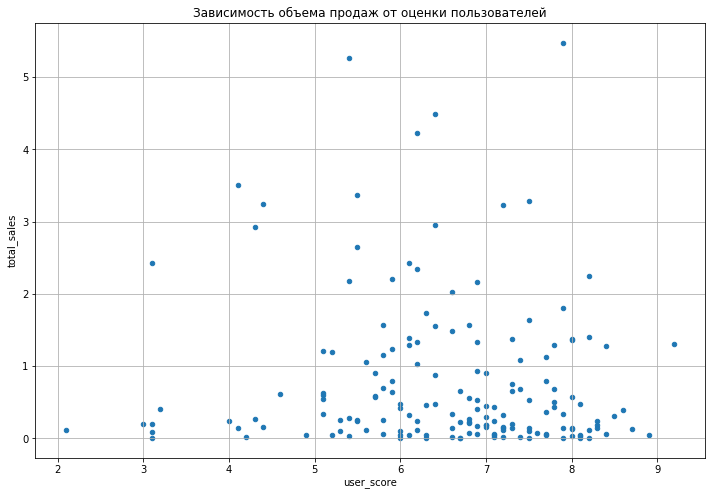

In [43]:
df_xone.plot(x='user_score',y='total_sales',kind='scatter', title='Зависимость объема продаж от оценки пользователей', \
            grid=True, figsize=(12,8));

По диаграмме рассеяния для оценок пользователей у платформы Xone зависимость не прослеживается.

Посчитаем матрицу корреляций для XOne:

In [44]:
df_xone_corr = df_xone[['critic_score', 'user_score', 'total_sales']]
df_xone_corr.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.410422
user_score,0.472462,1.000000,-0.094003
total_sales,0.410422,-0.094003,1.000000


Корреляция между отзывами пользователей и отсутствует, а между оценками критиков и продажами немного выше, но тоже не сильна.

**Построим диаграммы рассеяния для всех остальных платформ, на актуальный период.**

In [45]:
df_act_all = df.query('(platform not in ("PS4", "XOne")) and (year_of_release >= 2013) and (critic_score != "2222") and (user_score !="3333")')
df_act_all['platform'].value_counts()

PC      148
PS3     120
X360     81
PSV      76
WiiU     69
3DS      67
PSP       1
Name: platform, dtype: int64

**Диаграмма рассеяния оценок критиков**

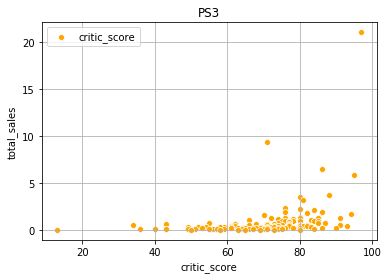

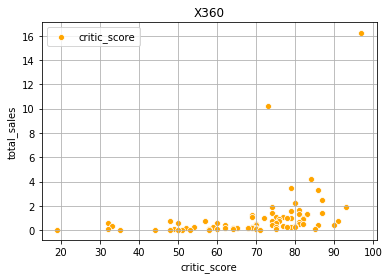

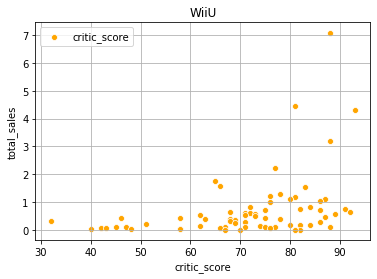

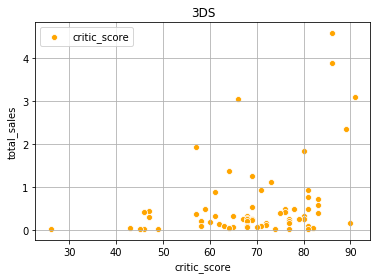

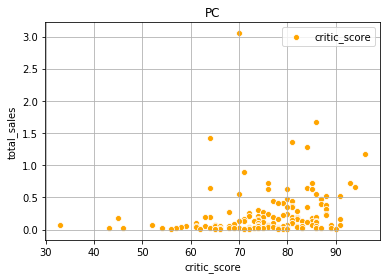

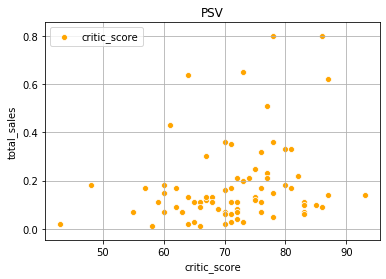

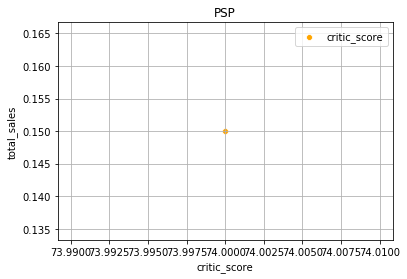

In [46]:
for name in df_act_all['platform'].unique():
    sns.scatterplot(data=df_act_all.query('platform == @name'), x='critic_score',y='total_sales', label = 'critic_score', color = 'orange')
    plt.legend()
    plt.grid()
    plt.title(name)
    plt.show();

**Диаграмма рассеяния оценок пользователей**

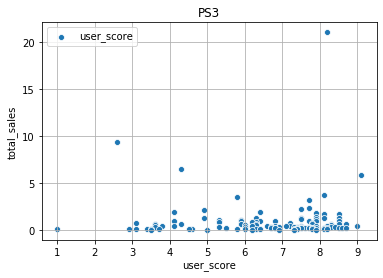

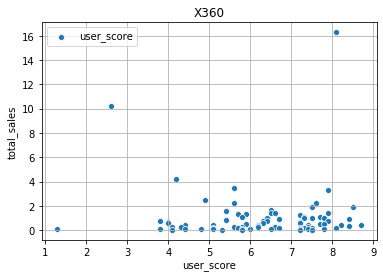

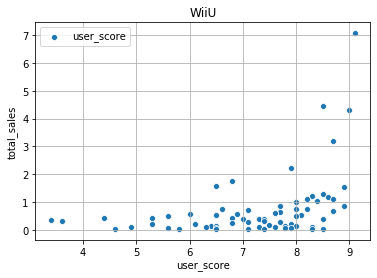

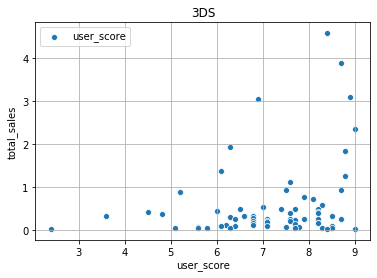

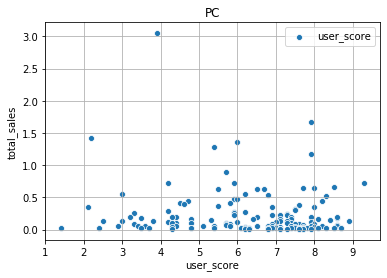

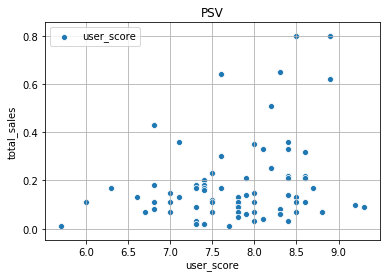

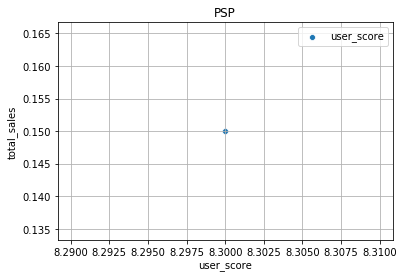

In [47]:
for name in df_act_all['platform'].unique():
    sns.scatterplot(data=df_act_all.query('platform == @name'), x='user_score',y='total_sales', label = 'user_score')
    plt.legend()
    plt.grid()
    plt.title(name)
    plt.show()

Посмотрев на все остальные платфомы можем сделать такие же выводы как и по платформам PS4 и Xone:

1. Игры с большими объемами продаж начинаются там где оценки критиков больше 65, но мы не можем утверждать, что высокие оценки критиками приводят к высоким продажам игр.
2. Продажи не зависят от оценок пользователей. 

**Посмотрим на общее распределение игр по жанрам.**

In [48]:
df_act['genre'].value_counts()

Action          443
Role-Playing    150
Shooter         120
Sports          110
Misc             93
Adventure        83
Racing           57
Platform         49
Simulation       47
Strategy         42
Fighting         38
Puzzle           14
Name: genre, dtype: int64

Можно выделить первые шесть позициций и сказать что на сегодня самое большое количество игр создано для жанров: 

- Action(самый играемый), затем идут
- Role-Playing, 
- Sports, 
- Shooter, 
- Misc и 
- Adventure.

In [49]:
df_act.groupby('genre')['total_sales'].agg(['count', 'sum']).sort_values(by = 'sum', ascending=False)

,count,sum
genre,,
Action,443,189.46
Shooter,120,164.27
Role-Playing,150,113.71
Sports,110,88.59
Platform,49,33.75
Misc,93,30.81
Racing,57,30.26
Fighting,38,25.50
Simulation,47,19.76


А вот самые прибыльные жанры:
- Action, 
- Shooter и
- Role-Playing

Самые низкие продажи у:
- Strategy
- Puzzle

Обобщив можем назвать топ3 жанров как самые прибыльные и для которых создано самое большое количесво игр:
- Action, 
- Shooter и
- Role-Playing

### Выводы:

За первые 15 лет индустрия произвела 3% всех игр, рассматриваем игры с 1995 года

Самые высокие продажи на платтформах PS2, X360, PS3, Wii, DS, PS. (700 - 1255 млн копий)  После этого продажи уменьшаются в два раза.

Средний срок жизни жизни платформы 8-11 лет. За время платформа растет, доходит до пика и угасает.

В 2016 у следующих платформ есть продажи и потенциал для роста:

1. PS4 - продажи около 70 млн, 3 года на рынке
2. XOne - продажи 25 млн, 3 года на рынке
3. WiiU - продажи около 5 миллионов, игра появилась в 2012
4. 3DS - продажи около 15 миллионов, игра появилась в 2011
5. PC - продажи около 5 миллионов, платформа актуальна всегда.

Актуальным можем считать период с 2013 года, в это время появляются новые платформы и стремятся продажи к нулю у старых.

Распределения по графику боксплот выглядят у всех очень похожими, выбросы говорят о том, что основная масса выпускаемых игр имеет относительно невысокие продажи в то время как единицы из них становятся “блокбастерами” с милионными тиражами. Лидер PS4 по играм с наибольшими продажами.

У всех четырех платформ основная масса игр имеет продажи до 0,75 млн копий. у PS4 и XOne они совсем похожи, WiiU имеет меньше продаж копий, у 3DS и PC самые небольшие продажи копий.

Построив диаграммы рассеяиния, сделали следующие выводы:
Для платформы PS4:
Никакой зависимости объемов продаж от оценки критиков вне прослеживается. Можно сказать что большее количество игр имеют оценку выше средней. Также можно сказать что игры с высокими имеют оценку критиков больше 65.

Никакой зависимости объемов продаж от оценки пользователей вне прослеживается. Можно сказать что большее количество игр имеют оценку выше средней, а также есть игры с низкими оценками пользователей и высокими объемами продаж.

Из матрицы корреляций видим слабую корреляцию в зависимости объемов продаж от оценки критиков. По диаграмме рассеяния это видно и отсутствие связи между оценками пользователей и объемами продаж.

Для платформы XOne:
На более высоких оценках критиков у платформы Xone появляются игры с большими продажами. Также можно сказать что игры с высокими имеют оценку критиков больше 65.

Корреляция между отзывами пользователей и продажами отсутстует, а между оценками критиков и продажами немного выше, но тоже не сильна.

Посмотрев на все остальные платформы можем сделать такие же выводы как и по платформам PS4 и Xone:

1. Игры с большими объемами продаж начинаются там где оценки критиков больше 65.
2. Продажи не зависят от оценок пользователей. 

Распределение игр по жанрам:

Самые низкие продажи у:
- Strategy
- Puzzle


Обобщив можем назвать топ3 жанров как самые прибыльные и для которых создано самое большое количесво игр:
- Action,
- Shooter и
- Role-Playing


## Шаг 4. Портрет пользователя каждого региона<a id='section6'></a>

**СЕВЕРНАЯ АМЕРИКА**

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [50]:
df_2013=df.query('year_of_release>2012')

In [51]:
df_na=df_2013.groupby('platform')['na_sales'].agg(['count', 'sum']).sort_values(by = 'sum', ascending=False)
df_na

,count,sum
platform,,
PS4,392,108.74
XOne,247,93.12
X360,186,81.66
PS3,345,63.50
3DS,303,38.20
WiiU,115,29.21
PC,189,11.11
Wii,23,6.56
PSV,358,5.04


In [52]:
df_na['sum'].sum()

437.7100000000002

In [53]:
#Посчитаем доли продаж:
df_na['part']=df_na['sum']/df_na['sum'].sum()

**Популярные платформы. Топ-5**

In [54]:
df_na.head()

,count,sum,part
platform,,,
PS4,392,108.74,0.248429
XOne,247,93.12,0.212744
X360,186,81.66,0.186562
PS3,345,63.50,0.145073
3DS,303,38.20,0.087272


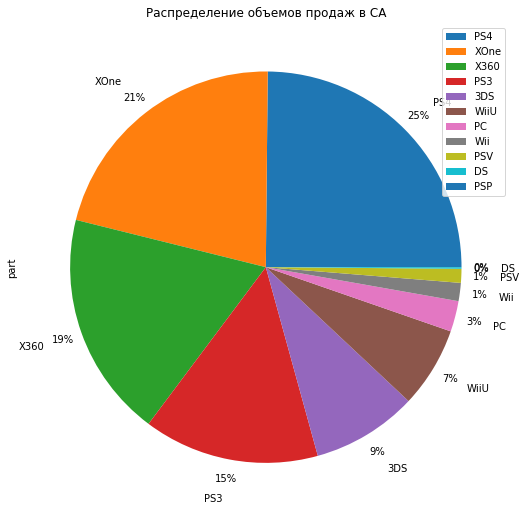

In [55]:
df_na.plot(y='part',kind='pie', title='Распределение объемов продаж в СА', \
            grid=True, figsize=(9,9), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);

Рынок Северной Америки  438.66 млн копий
PS4 (24%), XOne(21%), X360(19%), PS3(14%), 3DS (9%) начиная с 2013 года.

<div class="alert alert-block alert-warning">
<b>Комментарии от ревьюера:</b>

Хороший выбор типа графика, <s>но я бы добавил для информативности на piechart проценты
</div>

<font color=orange>Ok</font>


**Самые популярные жанры. Топ-5**

In [56]:
df_2013.groupby('genre')['na_sales'].agg(['count', 'sum']).sort_values(by = 'sum', ascending=False).head()

,count,sum
genre,,
Action,766,126.05
Shooter,187,109.74
Sports,214,65.27
Role-Playing,292,46.40
Misc,155,27.49


Топ-5 жанров: 
Action, Shooter, Sports, Role-Playing, Misc

**Влияет ли рейтинг ESRB на продажи в Северной Америке?**

- М - Зрелые
- E - Все
- E10 + - все 10 и старше
- T - Teen

In [57]:
df_2013.groupby('rating')['na_sales'].agg(['count', 'sum']).sort_values(by = 'sum', ascending=False)

,count,sum
rating,,
M,369,165.21
none,977,89.42
E,302,79.05
E10+,252,54.24
T,333,49.79


Самые большие продажи в Северной Америке имеют игры с рейтингом М.(Игры с рейтингом M считаются подходящими только для тех, кто старше 17 лет. По сравнению с названиями Teen, они могут содержать интенсивное насилие, сильный сексуальный контент, наготу и непрекращающиеся сильные выражения.)
На втором месте идут игры, в который рейтинг не указан, и далее игры с рейтингом Е(для всех)

In [58]:
90/465

0.1935483870967742

**Европа**

In [59]:
df_eu=df_2013.groupby('platform')['eu_sales'].agg(['count', 'sum']).sort_values(by = 'sum', ascending=False)
df_eu

,count,sum
platform,,
PS4,392,141.09
PS3,345,67.81
XOne,247,51.59
X360,186,42.52
3DS,303,30.96
PC,189,25.36
WiiU,115,19.85
PSV,358,6.10
Wii,23,5.93


In [60]:
#Посчитаем доли продаж:
df_eu['part']=df_eu['sum']/df_eu['sum'].sum()

In [61]:
df_eu['sum'].sum()

392.2300000000005

**Популярные платформы. Топ-5**

In [62]:
df_eu.head()

,count,sum,part
platform,,,
PS4,392,141.09,0.359712
PS3,345,67.81,0.172883
XOne,247,51.59,0.131530
X360,186,42.52,0.108406
3DS,303,30.96,0.078933


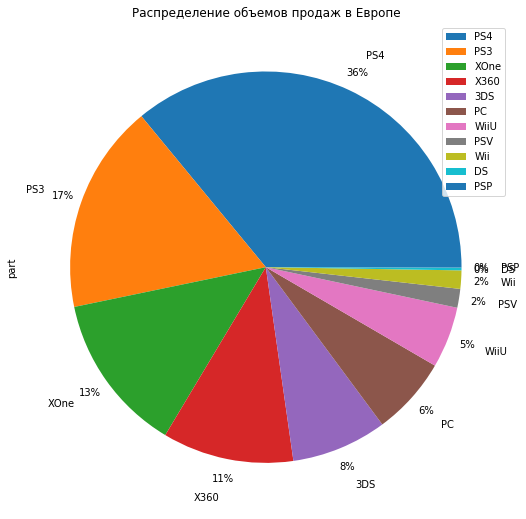

In [63]:
df_eu.plot(y='part',kind='pie', title='Распределение объемов продаж в Европе', \
            grid=True, figsize=(9,9), autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2);

Европейский рынок: 392.49 млн копий
В Европе лидирует PS4 с долей продаж 35%, за ними идут PS3 (17%) и XOne (13%), X360 (10%), 3DS (7%).

**Самые популярные жанры. Топ-5**

In [64]:
df_2013.groupby('genre')['eu_sales'].agg(['count', 'sum']).sort_values(by = 'sum', ascending=False).head()

,count,sum
genre,,
Action,766,118.13
Shooter,187,87.86
Sports,214,60.52
Role-Playing,292,36.97
Racing,85,20.19


В Европе люди играют в Action, Shooter, Sports, Role-Playing, Racing

**Влияет ли рейтинг ESRB на продажи в Европе?**

In [65]:
df_2013.groupby('rating')['eu_sales'].agg(['count', 'sum']).sort_values(by = 'sum', ascending=False)

,count,sum
rating,,
M,369,145.32
E,302,83.36
none,977,78.91
E10+,252,42.69
T,333,41.95


В Европе также как и в Америке, наиболее распростанены игры с рейтингом M (для зрелых), потом идут игры E (для всех) и примерно там же находятся игры без рейтинга. 

**ЯПОНИЯ**

In [66]:
df_jp=df_2013.groupby('platform')['jp_sales'].agg(['count', 'sum']).sort_values(by = 'sum', ascending=False)
df_jp

,count,sum
platform,,
3DS,303,67.81
PS3,345,23.35
PSV,358,18.59
PS4,392,15.96
WiiU,115,10.88
PSP,67,3.29
X360,186,0.51
XOne,247,0.34
Wii,23,0.05


In [67]:
#Посчитаем доли продаж:
df_jp['part']=df_jp['sum']/df_jp['sum'].sum()

In [68]:
df_jp['sum'].sum()

140.78000000000011

**Популярные платформы. Топ-5**

In [69]:
df_jp.head()

,count,sum,part
platform,,,
3DS,303,67.81,0.481674
PS3,345,23.35,0.165862
PSV,358,18.59,0.132050
PS4,392,15.96,0.113368
WiiU,115,10.88,0.077284


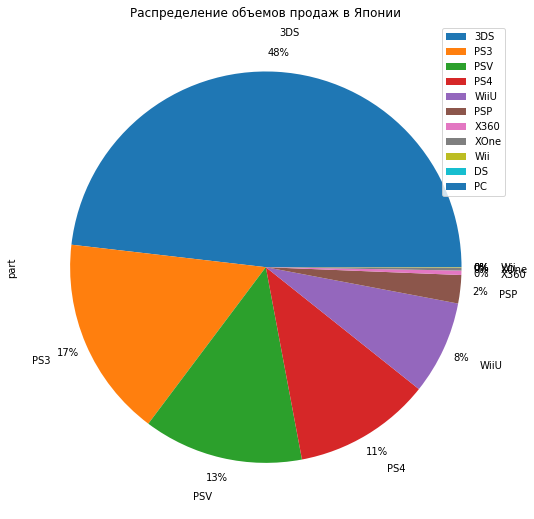

In [70]:
df_jp.plot(y='part',kind='pie', title='Распределение объемов продаж в Японии', \
            grid=True, figsize=(9,9), autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2);

Японский рынок: 140.9 млн копий
В японии лидирует с большим отрывом 3DS с долей 48%, PS3 с долей 16%, PSV (13%), PS4 (11%), WiiU(8%)

**Самые популярные жанры. Топ-5**

In [71]:
df_2013.groupby('genre')['jp_sales'].agg(['count', 'sum']).sort_values(by = 'sum', ascending=False).head()

,count,sum
genre,,
Role-Playing,292,51.04
Action,766,40.49
Misc,155,9.20
Fighting,80,7.65
Shooter,187,6.61


В Японии люди играют в Role-Playing, Action, Misc, Fighting, Shooter. Именно в таком порядке.

**Влияет ли рейтинг ESRB на продажи в Японии?**

In [72]:
df_2013.groupby('rating')['jp_sales'].agg(['count', 'sum']).sort_values(by = 'sum', ascending=False)

,count,sum
rating,,
none,977,85.05
T,333,20.59
E,302,15.14
M,369,14.11
E10+,252,5.89


60% всего рынка Японии занимают игры без рейтинга. Вероятно это связано с тем, что в Японии своя рейтинговая система, и свой, отличный от Европы и Америки рынок. Далее идут игры для подростков, потом для всех и потом для зрелых (у последних двух около 15млн копий). Подростки тут играют в большем количестве (в процентном отношении), чем остальные.

#### Вывод:

Проанализировав топы платформ и жанров, оценив влияние рейтинга ESRB, мы можем сделать следующие выводы:

1. Самой большой рынок в Северной Америке с продажами 438.66 млн копий
2. Рынок Северной Америки и европейский рынок похожи между собой по топовым платформам. И там и там в топе PS4 , XOne, X360, PS3, 3DS. Немного различается процентное отношение но незначительно.
3. Жанры игр, в Европе и Америке также практически полностью совпадают, только Американцы чуть больше любят квесты, а европейцы гонки. Топ 5 выглядит так: Action, Shooter, Sports, Role-Playing, Misc (Racing для Европы)
4. В Японии самый маленький рынок, и там больше всего любят портативные консоли. Топ платформ 3DS(48% рынка), PS3 , PSV, PS4, WiiU.
5. Жанры в Японии похожи по большей части: Role-Playing, Action, Misc, Fighting, Shooter. Но тут мы видим Fighting. 
6. Влияние рейтинга ESRB на продажи в Европе и Америке: 80% продаются с отметкой рейтинга. В Европе ESRB рейтинг не обязателен, но тут он видимо просто есть у игр, потому как предпочтения на игры на этих континентах похож.
7. В Японии рейтинг ESRB тут влияния сильного не имеет.

## Шаг 5. Проверка гипотез<a id='section7'></a>

**Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформулируем нулевую и альтернативную гипотезы:

**H0:** Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу PC

**H1:** Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу PC

Пороговое значение alpha = 0.05

Посчитаем дисперсии выборок:

In [73]:
var_xone = np.var(df.query('(platform == "XOne") and (user_score !="3333")')['user_score'])
var_xone

1.8965188383045526

In [74]:
var_pc = np.var(df.query('(platform == "PC") and (year_of_release>2012) and (user_score !="3333")')['user_score'])
var_pc

3.016306347554631

Построим распределения наших выбор, чтобы посмотреть их "нормальность":

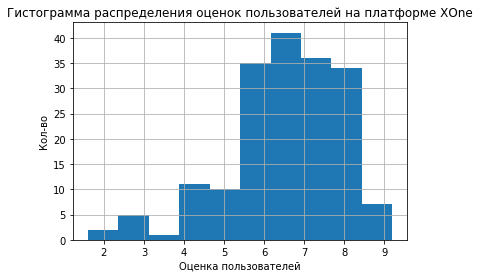

In [75]:
#для платформы XOne
df.query('(platform == "XOne") and (user_score !="3333")')['user_score'].hist()
plt.title('Гистограмма распределения оценок пользователей на платформе XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Кол-во');

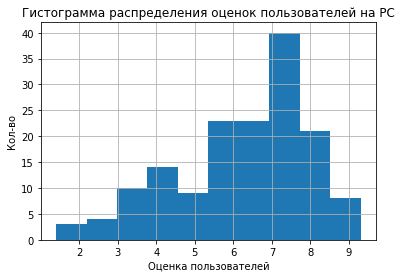

In [76]:
#для платформы PC
df.query('(platform == "PC") and (year_of_release>2012) and (user_score !="3333")')['user_score'].hist()
plt.title('Гистограмма распределения оценок пользователей на PC')
plt.xlabel('Оценка пользователей')
plt.ylabel('Кол-во');

Наблюдений больше 30, можем проводить т-тест 

In [77]:
alpha = .05

results = st.ttest_ind(
    df.query('(platform == "XOne") and (user_score !="3333")')['user_score'], 
    df.query('(platform == "PC") and (year_of_release>2012) and (user_score !="3333")')['user_score'],
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Значит мы не можем отвергнуть нулевую гипотезу:

**H0:** Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу PC

*****

**Гипотеза 2:
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Сформулируем нулевую и альтернативную гипотезы:

**H0:** Средний пользовательский рейтинг жанров Action равен среднему пользовательскому рейтингу жанра Sports

**H1:** Средний пользовательский рейтинг жанров Action не равен среднему пользовательскому рейтингу жанра Sports

Пороговое значение alpha = 0.05

Посчитаем дисперсии выборок:

In [78]:
var_action = np.var(df.query('(genre == "Action") and (year_of_release>2012) and (user_score !="3333")')['user_score'])
var_action

1.7648124186332366

In [79]:
var_sports = np.var(df.query('(genre == "Sports") and (year_of_release>2012) and (user_score !="3333")')['user_score'])
var_sports

3.160733984375

Построим распределения наших выбор, чтобы посмотреть их "нормальность":

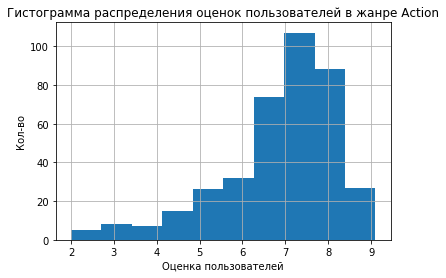

In [80]:
df.query('(genre == "Action") and (year_of_release>2012)and (user_score !="3333")')['user_score'].hist()
plt.title('Гистограмма распределения оценок пользователей в жанре Action')
plt.xlabel('Оценка пользователей')
plt.ylabel('Кол-во');

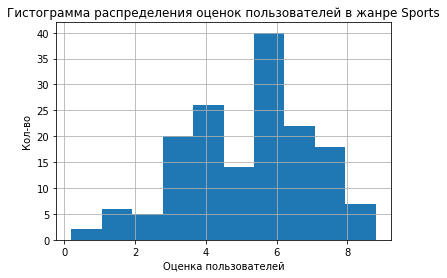

In [81]:
df.query('(genre == "Sports") and (year_of_release>2012) and (user_score !="3333")')['user_score'].hist()
plt.title('Гистограмма распределения оценок пользователей в жанре Sports')
plt.xlabel('Оценка пользователей')
plt.ylabel('Кол-во');

Количество наблюдений больше 30, можем проводить т-тест.

In [82]:
alpha = .05

results = st.ttest_ind(
    df.query('(genre == "Action") and (year_of_release>2012)and (user_score !="3333")')['user_score'], 
    df.query('(genre == "Sports") and (year_of_release>2012) and (user_score !="3333")')['user_score'],
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Значит мы можем рассматривать гипотезу

**H1: Средний пользовательский рейтинг жанров Action не равен среднему пользовательскому рейтингу жанра Sports**

## Шаг 6. Общий вывод<a id='section8'></a>

**Первый взгляд на таблицу:**

1. Практически в каждом столбце есть свои пропущенные значения, особенно много пропусков в данных с рейтингами игр. Возможно в какие-то года, каких-то рейтингов еще не существовало, или какие-то игры не участвовали в оценках по тем или иным причинам.

2. Названия столбцов с разными регистрами, надо привести к нижнему

**Подготовка данных**
1. Мы привели названия столбцов к нижнему регистру

2. Преобразовали year_of_release в тип int, для того чтобы применять все методы к этому столбцу;

3. Удалили две строки с nan в name, как несущественные

4. Обработали пропуски в столбцах:

    - **year_of_release** маркером 1111, ;
    - **critic_score** - пропуски в оценках критиков, оставим пропусками, так как апроксимировать эти значения, значит сильно искажать картину, и рейтинги будут необъективными. Заполнили пропуски в оценках критиков маркером 2222, так их удобнее отслеживать в дальнейшем:;
    - **user_score** - заменили значения tbd (to be determined - рейтинг будет определен) в столбце user_score на nan, так как пока этого рейтинга нет, и все nan заполним маркером 3333. Заполнять пропуски апроксимированными значениями, значит сильно искажать картину, и рейтинги будут необъективными.
    - заполнили пропуски в столбце **'rating'** значением none,  потому как мы не знали возрастного ограничения по играм;


5. Посчитали суммарные продажи по регионам, и запишем в отдельный столбец 'total_sales'.

**Исследовательский анализ данных**

1. За первые 15 лет индустрия произвела 3% всех игр, рассматриваем игры с 1995 года

2. Самые высокие продажи на платтформах PS2, X360, PS3, Wii, DS, PS. (700 - 1255 млн копий)  После этого продажи уменьшаются в два раза.

3. Средний срок жизни жизни платформы 8-11 лет. За время платформа растет, доходит до пика и угасает.

4. В 2016 у следующих платформ есть продажи и потенциал для роста:

    1. PS4 - продажи около 70 млн, 3 года на рынке
    2. Xone - продажи 25 млн, 3 года на рынке
    3. WiiU - продажи около 5 миллионов, игра появилась в 2012
    4. 3DS - продажи около 15 миллионов, игра появилась в 2011
    5. PC - продажи около 5 миллионов, платформа актуальна всегда.

5. Актуальным можем считать период с 2013 года, в это время появляются новые платформы и стремятся продажи к нулю у старых.

6. Посмотрев на все остальные платформы можем сделать такие же выводы как и по платформам PS4 и Xone:

    1. Игры с большими объемами продаж начинаются там где оценки критиков больше 65.
    2. Продажи не зависят от оценок пользователей. 

7. Распределение игр по жанрам:
Самые низкие продажи у:

- Strategy
- Puzzle

Обобщив можем назвать топ-3 жанров как самые прибыльные и для которых создано самое большое количество игр:
- Action,
- Shooter и
- Role-Playing

**Портрет пользователя каждого региона**

Проанализировав топы платформ и жанров, оценив влияние рейтинга ESRB, мы можем сделать следующие выводы:

1. Самой большой рынок в Северной Америке с продажами 438.66 млн копий, Европейский рынок - 392.49 млн копий, Япония - 140.9 млн копий
2. Рынок Северной Америки и европейский рынок похожи между собой по топовым платформам. И там и там в топе PS4 , XOne, X360, PS3, 3DS. Немного различается процентное отношение но незначительно.
3. Жанры игр, в Европе и Америке также практически полностью совпадают, только Американцы чуть больше любят квесты, а европейцы гонки. Топ 5 выглядит так: Action, Shooter, Sports, Role-Playing, Misc (Racing для Европы)
4. В Японии самый маленький рынок, и там больше всего любят портативные консоли. Топ платформ 3DS(48% рынка), PS3 , PSV, PS4, WiiU.
5. Жанры в Японии похожи по большей части: Role-Playing, Action, Misc, Fighting, Shooter. Но тут мы видим Fighting. 
6. Влияние рейтинга ESRB на продажи в Европе и Америке: 80% продаются с отметкой рейтинга. В Европе ESRB рейтинг не обязателен, но тут он видимо просто есть у игр, потому как предпочтения на игры на этих континентах похож.
7. В Японии рейтинг ESRB тут влияния сильного не имеет.

**Проверка гипотез:**

*Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

Проведя T-тест, мы сделали вывод о том, что мы не можем отвергнуть нулевую гипотезу:

   **H0: Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу PC**

*Гипотеза 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

Проведя T-тест, мы сделали вывод о том, что мы можем рассматривать гипотезу

   **H1: Средний пользовательский рейтинг жанров Action не равен среднему пользовательскому рейтингу жанра Sports**


Резюмируя:
   1. Считаем рынок Северной Америки и Европы максимально близкими по предпочтениям. 
    
   - Платформы PS4 , XOne, X360, PS3, 3DS, PC 
   - Жанры Action, Shooter, Sports, Role-Playing, Misc (Racing для Европы)
   - ESRB нужен
    
   2. Япония отличный от них рынок сосвоими предпочтениями и любяща портативные консоли.
   - Платформы 3DS(48% рынка), PS3 , PSV, PS4, WiiU, PC
   - Жанры  Role-Playing, Action, Misc, Fighting, Shooter.
   - ESRB не нужен